In [1]:
import pandas as pd
import logomaker as lm
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import lacroix

import json 

sns.set_style('white')

In [2]:
amypro = pd.read_pickle('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/full_amypro_predictions.pkl')
amypro['regions'] = amypro.apply(lambda row: [row['regions.region_1.region_indices'], row['regions.region_2.region_indices'], row['regions.region_3.region_indices'], row['regions.region_4.region_indices'], row['regions.region_5.region_indices']], axis=1)
amypro['len'] = amypro['sequence'].apply(lambda x: len(x))
amypro.head(2)

,entry_id,pdb_id,pubmed_ids,protein_name,prion_domain,class_name,uniprot_id,sequence,mutations,uniprot_end,...,data_split_fold4,data_split_fold5,predictions_0,predictions_1,predictions_2,predictions_3,predictions_4,prediction_avg,regions,len
0,AP00055,N/A,"[19345193, 22561191]",Nup100,True,not known,Q02629,MFGNNRPMFGGSNLSFGSNTSSFGGQQSQQPNSLFGNSNNNNNSTS...,[],,...,test,test,"[0.7316529, 0.7328647, 0.732098, 0.7378513, 0....","[0.8501159, 0.8493195, 0.85526776, 0.8564786, ...","[0.5530683, 0.55522496, 0.56574315, 0.5665131,...","[0.76970214, 0.76953703, 0.77655387, 0.7786879...","[0.7671536, 0.76988834, 0.7695552, 0.7754302, ...","[0.7343385696411133, 0.7353669166564941, 0.739...","[300-400, nan, nan, nan, nan]",959
1,AP00054,N/A,"[19345193, 21453424]",New1,True,functional prion,Q08972,MPPKKFKDLNSFLDDQPKDPNLVASPFGGYFKNPAADAGSNNASKK...,[],,...,test,test,"[0.732912, 0.7335862, 0.73368204, 0.73375416, ...","[0.8562108, 0.85515267, 0.85701126, 0.855329, ...","[0.5763016, 0.57238704, 0.57504857, 0.5707282,...","[0.7824801, 0.7830645, 0.7824525, 0.78039426, ...","[0.77139574, 0.7709084, 0.7712728, 0.77131885,...","[0.7438600540161133, 0.7430197715759277, 0.743...","[1-153, nan, nan, nan, nan]",1196


# presets

In [3]:
def hex_to_rgb(hex_code):
    """Convert a hex color code to an RGB tuple in the range of 0 to 1."""
    # Remove the hash symbol if it exists
    hex_code = hex_code.lstrip('#')
    
    # Convert the hex code to RGB values
    r = int(hex_code[0:2], 16) / 255.0
    g = int(hex_code[2:4], 16) / 255.0
    b = int(hex_code[4:6], 16) / 255.0
    
    return np.array([r, g, b])

In [4]:
lcb = hex_to_rgb(lacroix.colorList('Berry')[4])
lcg = hex_to_rgb(lacroix.colorList('Lime')[2])

d = {'R': lcb,
 'r': lcb,
 'K': lcb,
 'k': lcb,
 'D': lcb,
 'd': lcb,
 'E': lcb,
 'e': lcb,
 'N': lcb,
 'n': lcb,
 'Q': lcb,
 'q': lcb,
 'S': lcg,
 's': lcg,
 'G': lcg,
 'g': lcg,
 'H': lcg,
 'h': lcg,
 'T': lcg,
 't': lcg,
 'A': lcg,
 'a': lcg,
 'P': lcg,
 'p': lcg,
 'Y': np.array([0., 0., 0.]),
 'y': np.array([0., 0., 0.]),
 'V': np.array([0., 0., 0.]),
 'v': np.array([0., 0., 0.]),
 'M': np.array([0., 0., 0.]),
 'm': np.array([0., 0., 0.]),
 'C': np.array([0., 0., 0.]),
 'c': np.array([0., 0., 0.]),
 'L': np.array([0., 0., 0.]),
 'l': np.array([0., 0., 0.]),
 'F': np.array([0., 0., 0.]),
 'f': np.array([0., 0., 0.]),
 'I': np.array([0., 0., 0.]),
 'i': np.array([0., 0., 0.]),
 'W': np.array([0., 0., 0.]),
 'w': np.array([0., 0., 0.])}

# abeta

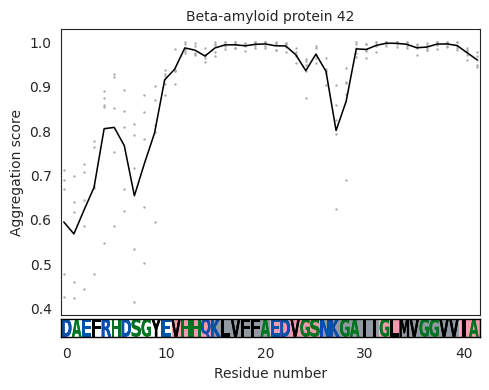

In [39]:
ctr = 0
for row in amypro[amypro['protein_name'] == 'Beta-amyloid protein 42'].iterrows():
    if len(row[1]['sequence']) < 100:
        name = row[1]['protein_name']
        index = row[0]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.4, 4), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  
        ax1.plot(amypro[amypro['protein_name'] == name]['prediction_avg'][index], color='k', lw=1.125)
        for j in range(5):
            ax1.scatter(range(len(row[1][f'predictions_{j}'])), amypro[amypro['protein_name'] == name][f'predictions_{j}'][index], color='darkgrey', s=0.5)
      
        ax1.set_ylabel('Aggregation score', fontsize=10)
        input_string = str(amypro[amypro['protein_name'] == name]['sequence'].reset_index(drop=True)[0])
        ax1.set_title(name, fontsize=10)
        wt_seq = input_string
        count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
        ax1.set_xlim([0-0.25,len(input_string)-1+0.25])
        #ax1.set_ylim([0,1])
        
        logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
        logo_wt.rgb_dict = d 
        logo_wt._compute_glyphs()
        logo_wt.draw()

        for i in row[1]['regions']:
            if type(i) == str:
                pmin = int(i.split('-')[0])
                pmax = int(i.split('-')[1])
                logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[2], alpha=0.4)

        if name == 'Beta-amyloid protein 42':
            for i in [[15,20], [26,31], [34,39]]:
                pmin = i[0]
                pmax = i[1]
                logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[3], alpha=0.4)
        
        logo_wt.ax.set_title('')
        logo_wt.ax.xaxis.set_ticks_position('none')
        logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
        logo_wt.ax.get_yaxis().set_visible(False)
        ax1.get_xaxis().set_visible(False)
        ax2.set_xticks(np.arange(-10,50,10))
        ax2.set_xlim([-0.55,41.6])
        plt.xlabel('Residue number', fontsize=10)
        ax1.tick_params(axis='both', labelsize=10)
        ax2.tick_params(axis='both', labelsize=10)
        
        plt.show()
        fig.savefig('abeta.png', dpi=600, bbox_inches='tight')
        fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_abeta.png', dpi=600, bbox_inches='tight')
        fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_abeta.pdf', dpi=600, bbox_inches='tight')
        #fig.savefig(f'/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/pngs/{name}.png', dpi=500, bbox_inches='tight')

# PB1

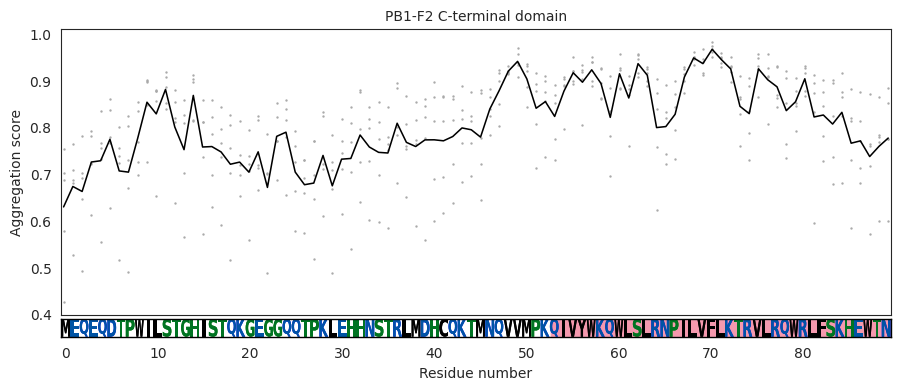

In [40]:
ctr = 0

# lacroix.colorList('Berry')[2]

for row in amypro[amypro['protein_name'] == 'PB1-F2 C-terminal domain'].iterrows():
    if len(row[1]['sequence']) < 100:
        name = row[1]['protein_name']
        index = row[0]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10.7, 4), gridspec_kw={'height_ratios': [4, 0.25], 'hspace': 0.025})  
        ax1.plot(amypro[amypro['protein_name'] == name]['prediction_avg'][index], color='k', lw=1.125)
        for j in range(5):
            ax1.scatter(range(len(row[1][f'predictions_{j}'])), amypro[amypro['protein_name'] == name][f'predictions_{j}'][index], color='darkgrey', s=0.5)
      
        ax1.set_ylabel('Aggregation score', fontsize=10)
        input_string = str(amypro[amypro['protein_name'] == name]['sequence'].reset_index(drop=True)[0])
        ax1.set_title(name, fontsize=10)
        wt_seq = input_string
        count_df = lm.alignment_to_matrix([wt_seq], to_type='counts')
        ax1.set_xlim([0-0.25,len(input_string)-1+0.25])
        #ax1.set_ylim([0,1])
        
        logo_wt = lm.Logo(count_df, color_scheme='hydrophobicity', ax=ax2)
        logo_wt.rgb_dict = d 
        logo_wt._compute_glyphs()
        logo_wt.draw()

        for i in row[1]['regions']:
            if type(i) == str:
                pmin = int(i.split('-')[0])
                pmax = int(i.split('-')[1])
                logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[2], alpha=0.4)

        if name == 'Beta-amyloid protein 42':
            for i in [[15,20], [26,31], [34,39]]:
                pmin = i[0]
                pmax = i[1]
                logo_wt.highlight_position_range(pmin=pmin, pmax=pmax, color=lacroix.colorList('CranRaspberry')[3], alpha=0.4)
        
        logo_wt.ax.set_title('')
        logo_wt.ax.xaxis.set_ticks_position('none')
        logo_wt.style_spines(spines=['top', 'bottom', 'left', 'right'], visible=True)
        logo_wt.ax.get_yaxis().set_visible(False)
        ax1.get_xaxis().set_visible(False)
        plt.xlabel('Residue number', fontsize=10)

        ax1.tick_params(axis='both', labelsize=10)
        ax2.tick_params(axis='both', labelsize=10)
        
        plt.show()
        fig.savefig('pb1.png', dpi=600, bbox_inches='tight')
        fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_pb1.png', dpi=600, bbox_inches='tight')
        fig.savefig('/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/2506_figures_final/fig4_pb1.pdf', dpi=600, bbox_inches='tight')
        #fig.savefig(f'/novo/projects/departments/cdd/public/users/ehec/au24/plotting_for_paper/seqplotting/pngs/{name}.png', dpi=500, bbox_inches='tight')